In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [119]:
data_test = pd.read_csv('Test.csv')
data_train = pd.read_csv('Train.csv')

In [87]:
data_train['Item_Description'][0]

'Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design'

In [125]:
data_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [88]:
data_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


In [89]:
data_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 6 columns):
Inv_Id              5566 non-null int64
Vendor_Code         5566 non-null object
GL_Code             5566 non-null object
Inv_Amt             5566 non-null float64
Item_Description    5566 non-null object
Product_Category    5566 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 261.0+ KB


In [91]:
data_train.shape, data_test.shape

((5566, 6), (2446, 5))

In [92]:
data_train.describe()

,Inv_Id,Inv_Amt
count,5566.000000,5566.000000
mean,19010.787100,49.980151
std,2306.607485,28.903030
min,15001.000000,0.010000
25%,17006.250000,24.957500
50%,19017.500000,49.645000
75%,20994.750000,75.170000
max,23012.000000,99.990000


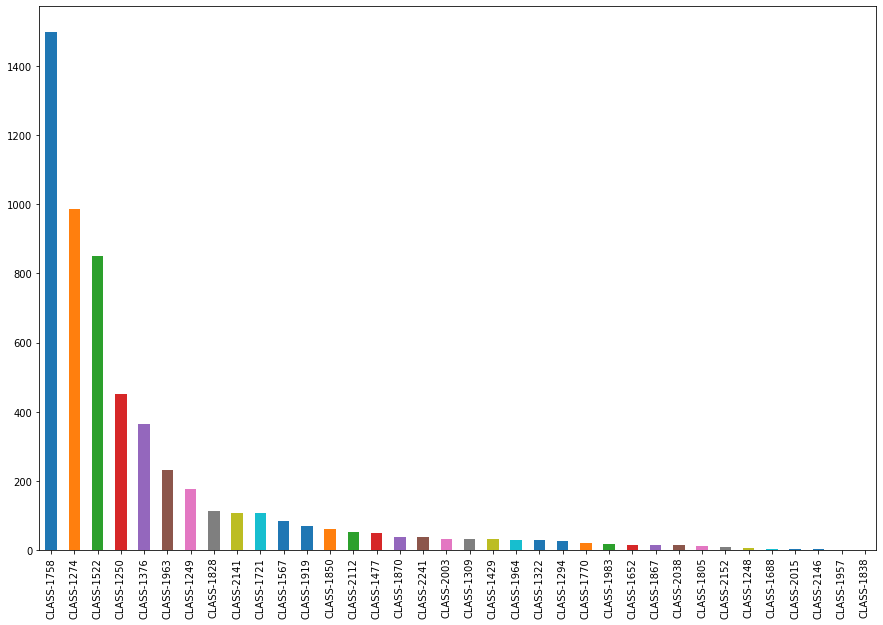

In [93]:
plt.figure(figsize=(15,10))
data_train['Product_Category'].value_counts().plot.bar()
plt.show()

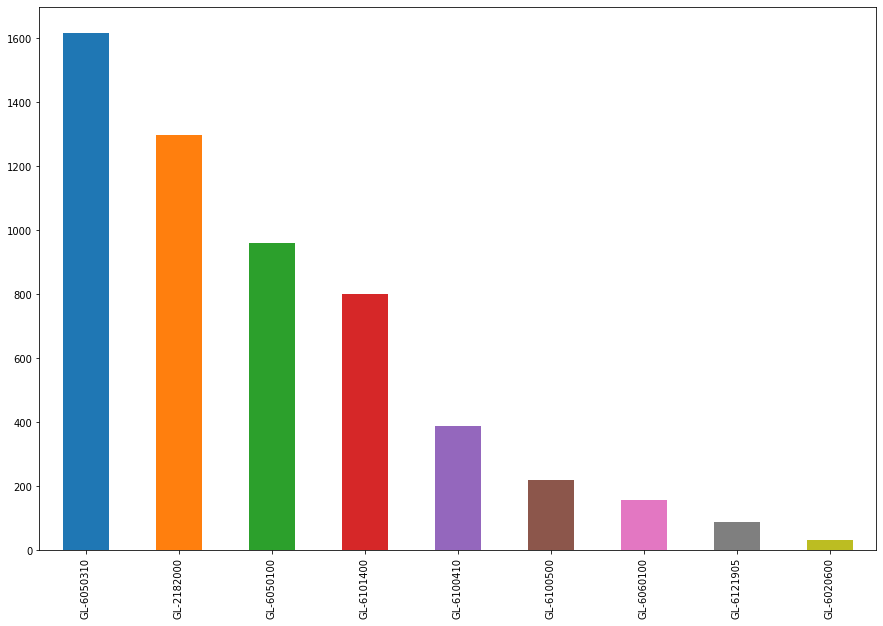

In [94]:
plt.figure(figsize=(15,10))
data_train['GL_Code'].value_counts().plot.bar()
plt.show()

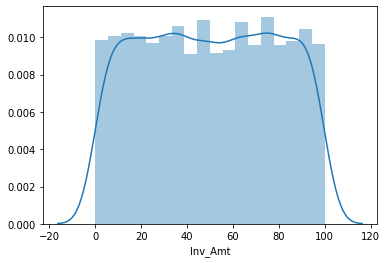

In [95]:
plt.figure(1)
sns.distplot(data_train['Inv_Amt']);

In [96]:
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import pickle

stopwords = stopwords.words('english')



In [126]:
def cleanDescription(df):
    processed_text = []
    for sentence in tqdm(df):
        sentence = re.sub("\S*\d\S*", "", sentence).strip() #removing digits
        sentence = re.sub('[^A-Za-z]+', ' ', sentence) #removing space
        sentence = ''.join(e.lower() for e in sentence.split() if e.lower() not in list(stopwords))
        #converting everything to lower case while removing stopwords and joining evrything together
        processed_text.append(sentence.strip()) #strip to remove spaces infront and behind
        
    return processed_text

In [127]:
data_train['Item_Description']=cleanDescription(data_train['Item_Description'].values)
data_train.drop('Inv_Id',axis=1,inplace=True) #dropping invoice id because it is not neccessary

100%|██████████| 5566/5566 [00:00<00:00, 11081.07it/s]


In [128]:
data_train.head()

,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,VENDOR-1676,GL-6100410,83.24,artworkingtypesettingproductionjunchampionpart...,CLASS-1963
1,VENDOR-1883,GL-2182000,51.18,autoleasingcorporateservicescorningincnyautole...,CLASS-1250
2,VENDOR-1999,GL-6050100,79.02,storemanagementleaserentdeltonacorprealestateb...,CLASS-1274
3,VENDOR-1771,GL-6101400,48.50,storeconstructiongeneralrequirementscolonialtr...,CLASS-1522
4,VENDOR-1331,GL-2182000,63.35,julaydincorpcontingentlabortemplaborcontingent...,CLASS-1376


In [129]:
data_train.nunique()

Vendor_Code         1253
GL_Code                9
Inv_Amt             4258
Item_Description    3353
Product_Category      36
dtype: int64

In [100]:
class Transform:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [101]:
tr = Transform(columns=['Vendor_Code','GL_Code','Product_Category', 'Item_Description'])
transformed_data = tr.fit_transform(data_train)
transformed_data.head()

,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,546,5,83.24,208,25
1,709,0,51.18,261,2
2,806,2,79.02,3129,3
3,619,7,48.50,2952,10
4,259,0,63.35,1949,7


In [102]:
transformed_data.head()

,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,546,5,83.24,208,25
1,709,0,51.18,261,2
2,806,2,79.02,3129,3
3,619,7,48.50,2952,10
4,259,0,63.35,1949,7


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings

warnings.filterwarnings('ignore')

In [104]:
X = transformed_data.drop('Product_Category',axis=1).values
y = transformed_data["Product_Category"].values

In [105]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [106]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.551185 (0.018617)
LDA: 0.740915 (0.010876)
KNN: 0.762731 (0.015701)
CART: 0.912038 (0.011326)
NB: 0.708197 (0.010364)
SVM: 0.337095 (0.013770)


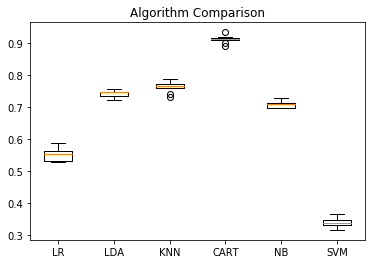

In [107]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [108]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [109]:
predictions

array([15,  3, 10, ...,  2,  2, 10])

In [110]:
print(accuracy_score(Y_validation, predictions))
print("\n")
print(confusion_matrix(Y_validation, predictions))
print("\n")
print(classification_report(Y_validation, predictions))

0.9183123877917415


[[ 1  0  0 ...  0  0  0]
 [ 0 27  3 ...  0  0  2]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  4]]


              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.93      0.79      0.86        34
           2       0.96      1.00      0.98        87
           3       0.99      0.96      0.97       210
           4       1.00      0.75      0.86         4
           5       0.60      0.50      0.55         6
           6       0.78      0.88      0.82         8
           7       0.85      0.91      0.88        70
           8       0.71      0.83      0.77         6
           9       0.90      0.75      0.82        12
          10       0.95      0.98      0.96       181
          11       0.93      0.82      0.87        17
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          

In [111]:
data_test['Item_Description']=cleanDescription(data_test['Item_Description'].values)
data_test.drop('Inv_Id',axis=1,inplace=True)

100%|██████████| 2446/2446 [00:00<00:00, 10813.79it/s]


In [112]:
data_test.head()

,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,VENDOR-2513,GL-6050310,56.13,travelentertainmentmiscellaneouscompanycarfiel...
1,VENDOR-1044,GL-6101400,96.56,finalsitecleanstoreconstructionadvancedmicrode...
2,VENDOR-1254,GL-6101400,55.93,arabianamericandevelopmentcofinalsitecleangene...
3,VENDOR-1331,GL-2182000,32.62,corporateservicescontingentlabortemplaborhuman...
4,VENDOR-2513,GL-6050310,25.81,fortunenationalcorpmiscellaneouscompanycarfiel...


In [113]:
tr = Transform(columns=['Vendor_Code','GL_Code', 'Item_Description'])
transformed_test_data = tr.fit_transform(data_test)
transformed_test_data.head()

,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,772,3,56.13,1713
1,20,7,96.56,718
2,137,7,55.93,105
3,174,0,32.62,523
4,772,3,25.81,795


In [114]:
data_input = {
    'Vendor_Code': 'VENDOR-1676',
    'GL_Code': 'GL-6100410',
    'Item_Description': 'Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design',
    'Inv_Amt': 83.24,
}

In [115]:
import pickle
data = {
    'stopwords': stopwords,
    'model': model,
    "train_Data":data_train, 
    "x_train":X_train, 
    "x_test":X_validation, 
    "y_train":Y_train, 
    "y_test":Y_validation
}

pickle.dump(data, open("modelData.pkl", "wb"))


In [116]:
data = pickle.load( open( "modelData.pkl", "rb" ) )

In [120]:


model = data['model']
stopwords = data['stopwords']

def cleanDescription(df):
    processed_text = []
    for sentence in tqdm(df):
        sentence = re.sub("\S*\d\S*", "", sentence).strip()
        sentence = re.sub('[^A-Za-z]+', ' ', sentence)
        sentence = ''.join(e.lower() for e in sentence.split() if e.lower() not in list(stopwords))
        processed_text.append(sentence.strip())
        
    return processed_text

class Transform:
    
    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output



def makePrediction(data):
        data['Item_Description']=cleanDescription(data['Item_Description'].values)
        tr = Transform(columns=['Vendor_Code','GL_Code', 'Item_Description'])
        transformed_data = tr.fit_transform(data)
        transformed_data.drop('Inv_Id',axis=1,inplace=True)

        return {'X':transformed_data,
                'Y':model.predict(transformed_data)}

In [121]:
res = makePrediction(data_test)

100%|██████████| 2446/2446 [00:00<00:00, 10910.40it/s]


In [122]:
res['Y'] = pd.DataFrame(data=res['Y'],    # values
              index=res['Y'],    # 1st column as index
           columns=['predicted']) 

In [123]:
res['Y']

,predicted
15,15
10,10
10,10
7,7
15,15
15,15
7,7
6,6
7,7
5,5


In [124]:
res['X'] 

,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,772,3,56.13,1713
1,20,7,96.56,718
2,137,7,55.93,105
3,174,0,32.62,523
4,772,3,25.81,795
5,772,3,22.71,796
6,450,0,47.38,131
7,788,1,26.08,1650
8,481,0,42.76,557
9,530,6,70.47,1432
